##Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3
###Μαυραειδή Λυδία ΑΜ:03117181
###Τσακανίκα Χριστίνα ΑΜ:03117012

##**1ο** Μέρος: Αξιολόγηση


In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self,y_true,y_pred,x):
      self.y_true = y_true
      self.y_pred = y_pred
      self.x = x

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      
      right_predictions = 0 #number of right predictions
      for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
          right_predictions += 1
      
      acc=right_predictions / len(y_true)
      
      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision" : precision, "recall": recall, "f1": f1,"accuracy":self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_sample_of_wrong(self, rows = 5, lines = 4):
        wrong_indexes = [index for index in range(len(self.y_true)) if self.y_true[index] != self.y_pred[index]]
        plt.figure(figsize=(10, 10))

        #Shuffle a list (reorganize the order of the list items)
        random.shuffle(wrong_indexes)
        for i, index in enumerate(wrong_indexes[: rows*lines]):
            plt.subplot(rows, lines, i + 1)
            image = self.x[index]
            plt.imshow(image.reshape((28, 28)))
            plt.title("Real: {}, Pred: {}".format(self.y_true[index], self.y_pred[index]))
            plt.axis('off')

    def get_evaluation_report(self):
       metrics = self.get_metrics()
       for m in metrics:
         print(m+' : '+str(metrics[m]))
       cm = self.confusion_matrix()
       print("Confusion matrix: ")
       print(cm)
       print("Some images with wrong predictions")
       self.get_sample_of_wrong()

precision : 0.7000000000000001
recall : 0.6944444444444443
f1 : 0.6888888888888888
accuracy : 0.625
Confusion matrix: 
[[3 1 0]
 [2 1 0]
 [0 0 1]]
Some images with wrong predictions


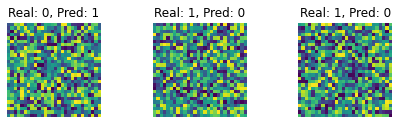

In [ ]:
y_true = [1,0,2,0,0,1,1,0]
y_pred = [0,0,2,0,1,1,0,0]
x = np.random.rand(8,28*28)

eval = Evaluate(y_true,y_pred,x)
eval.get_evaluation_report()

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

train_dset = pd.read_csv('/content/sample_data/mnist_train_small.csv',header=None)
test_dset = pd.read_csv('/content/sample_data/mnist_test.csv',header=None)
## From https://colab.research.google.com/notebooks/mlcc/multi-class_classification_of_handwritten_digits.ipynb#scrollTo=JfFWWvMWDFrR
def parse_labels_and_features(dataset):
  """Extracts labels and features.
  
  This is a good place to scale or transform the features if needed.
  
  Args:
    dataset: A Pandas `Dataframe`, containing the label on the first column and
      monochrome pixel values on the remaining columns, in row major order.
  Returns:
    A `tuple` `(labels, features)`:
      labels: A Pandas `Series`.
      features: A Pandas `DataFrame`.
  """
  labels = dataset[0]
  
  # DataFrame.loc index ranges are inclusive at both ends.
  features = dataset.loc[:,1:784]
  # Scale the data to [0, 1] by dividing out the max value, 255.
  features = features / 255

  return labels, np.array(features)

def show_image(features):
  img = features.reshape((28,28))
  plt.imshow(img)
  plt.show()

y_train,x_train = parse_labels_and_features(train_dset)
y_test,x_test = parse_labels_and_features(test_dset)

Ποια είναι η μορφή των δεδομένων για μια εικόνα;

In [ ]:
print("Shape of an image: "+str(x_train[0].shape))
print("Max value of pixel: "+str(np.max(x_train[0])))

Shape of an image: (784,)
Max value of pixel: 1.0


Φορτώνουμε μια τυχαία εικόνα και την εμφανίζουμε, μαζί με την ετικέτα της

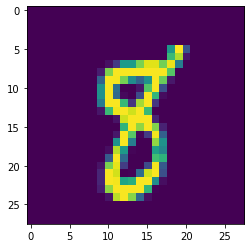

Label = 8


In [ ]:
i = np.random.randint(0,x_train.shape[0])
show_image(x_train[i])

print("Label = " +str(y_train[i]))

##2o Μέρος: Υλοποίηση KNN

In [ ]:
## Simple KNN
from collections import Counter
from numpy import linalg
class KNN:
  def __init__(self,x,y,k,distance="euclidian"):
    self.x = x
    self.y = y
    self.k = k
    self.distance = distance
 
  def get_distance(self,img1,img2):
    
    if self.distance=='euclidian':
      #k_most_similar = self.get_knn(img)
    
      #prediction = self.y[k_most_similar[0]] 
      #uniq_label, counts = np.unique(nn_labels, return_counts = True)
      #prediction = uniq_label[counts.argmax()]
      vector = img1-img2
      dist = linalg.norm(vector)
       
    elif self.distance=='cosine':
      
      product = np.inner(img1, img2)
      img1 = linalg.norm(img1)
      img2 = linalg.norm(img2)
      dist = 1 - product/(img1*img2) 
      pass
    return dist


  ## Given an image as a vector, returns indexes of k nearest neighbors
  def get_knn(self,img):
    distances = list()
    x = self.x
    k = self.k
    
    for i in range(len(x)):
      distances.append(self.get_distance(img, x[i]))
    
    # Sort distances, and return the indexes of k first elements
    ans_indexes = np.argsort(distances)[:k]
    return ans_indexes


  ## Given an image as a vector, classify it according to KNN
  def classify(self,img):
    y = self.y
    nn_labels = [y[i] for i in self.get_knn(img)]
    uniq_label, counts = np.unique(nn_labels, return_counts = True)
    prediction = uniq_label[counts.argmax()]
    #prediction = Counter(nn_labels).most_common(1)[0][0]
    return prediction


knn = KNN(x_train,y_train,k=5,distance='euclidian')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονομένες εικόνες

Input image: 


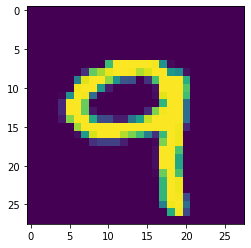

Prediction : 9


In [ ]:
img = x_test[np.random.randint(0,x_test.shape[0])]
print("Input image: ")
show_image(img)
print('Prediction : '+str(knn.classify(img)))

In [ ]:
## Παίρνουμε όλες τις προβλέψεις στο test set (πρώτες 100 εικόνες)
## ..υπομονή μερικά λεπτά
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


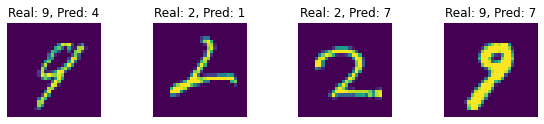

In [ ]:
eval = Evaluate(labels,preds,x_test[:100])
eval.get_evaluation_report()

##Έτοιμος ΚΝΝ classifier

precision : 0.9749019607843138
recall : 0.9568181818181818
f1 : 0.962567733990148
accuracy : 0.96
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 0  1  6  0  0  0  0  1  0  0]
 [ 0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0 14  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  0  0  0  0  0 15  0  0]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  1  0  9]]
Some images with wrong predictions


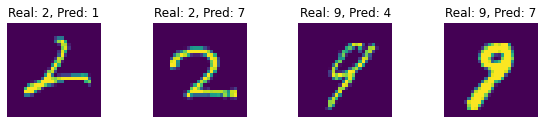

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100],y_pred,x_test[:100])
eval.get_evaluation_report()

##Σύκγριση υλοποιήσεων

In [ ]:
%%time
knn = KNN(x_train,y_train,k=5,distance='euclidian')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 22.2 s, sys: 79 ms, total: 22.3 s
Wall time: 22.3 s


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 7.51 s, sys: 8.01 ms, total: 7.52 s
Wall time: 7.52 s


##Σχολιασμός

Πράγματι, παρατηρούμε πως ο έτοιμος ταξινομητής " KNeighborsClassifier" παρουσιάζει τα ίδια ακριβώς αποτελέσματα "precision : 0.9749019607843138, 
recall : 0.9568181818181818, 
f1 : 0.962567733990148,
accuracy : 0.96" με τον ταξινομητή που κατασκευάσαμε εμείς, για την ευκλίδεια απόσταση. Οι επιδόσεις του δικού μας ταξινομητή για τη συνάρτηση συνημιτόνου είναι καλέτερες του έτοιμου classifier.
Συγρίνοντας τους χρόνους εκτέλεσης, όπως φαίνεται παραπάνω, ο έτοιμος ταξινομητής καθυστερεί περισσότερο.
Για μεγαλύτερες τιμές του k το μοντέλο γίνεται απλόυστερο, αφού η προσαρμογή είναι μειωμένη (underfit) και έχουμε ως αποτέλεσμα χαμηλότερο variance και υψηλότερο bias.
Για υψηλότερες τιμές του k το μοντέλο γίνεται σύνθετο, αυξάνεται η προσαρμογή (overfit) και έχουμε ως αποτέλεσμα υψηλότερο variance και χαμηλότερο bias.

##3ο Μέρος: Naive Bayes

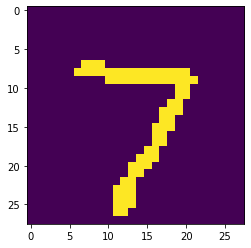

In [ ]:
## Στρογγυλοποίηση:
x_train_r = np.round(x_train)
x_test_r = np.round(x_test)
show_image(x_test_r[0])

In [ ]:
class NaiveBayes:
  def __init__(self,x,y):
    self.x = x
    self.y = y
    ## pC is a vector with the probability of each class
    self.pC = np.zeros((10,))
    ## pxC is an array with all probabilities p(xi|C)
    self.pxC = np.zeros((x.shape[-1],10))
    ## Compute the probabilities
    self.compute_probabilities()

  def compute_probabilities(self):

    for i in range(len(self.x)):
      for j in range(len(self.x[i])):
        self.pxC[j][self.y[i]] += self.x[i][j]

    for label in self.y:
      self.pC[label]+=1
    for j in range(10):
      self.pxC[:, j] = self.pxC[:, j] / self.pC[j]
    self.pC = self.pC/self.y.shape[0]

  def predict(self,x):
    
    pcX = np.ones((10,))
    
    for i in range(10):
      
      pcX[i] = self.pC[i]
      for j in range(28*28):
        if x[j] != 0:   
          pcX[i] *= self.pxC[j][i]
        else:
          pcX[i] *= (1-self.pxC[j][i])
     
    return np.argmax(pcX)

##Αξιολόγηση του Naive Bayes

precision : 0.8400974025974026
recall : 0.850108225108225
f1 : 0.8261529454950507
accuracy : 0.85
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  1  0]
 [ 0 13  0  1  0  0  0  0  0  0]
 [ 0  0  7  1  0  0  0  0  0  0]
 [ 0  0  1 10  0  0  0  0  0  0]
 [ 1  0  0  0 12  0  0  0  0  1]
 [ 0  0  0  2  1  4  0  0  0  0]
 [ 0  0  2  0  0  0  8  0  0  0]
 [ 0  0  1  0  0  0  0 13  0  1]
 [ 0  0  0  0  0  0  0  0  2  0]
 [ 0  0  0  0  1  0  0  0  1  9]]
Some images with wrong predictions


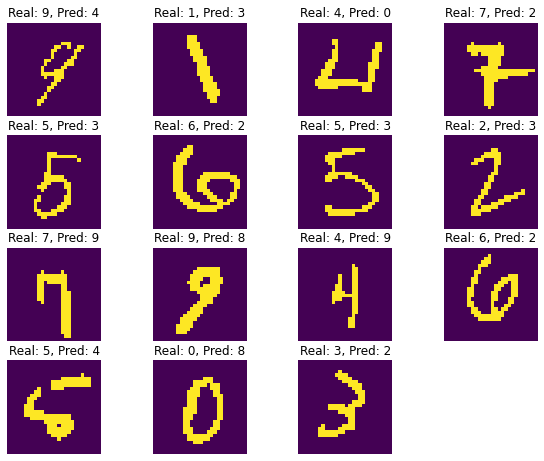

In [ ]:
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds, x_test_r[:100])
eval.get_evaluation_report()

##Έτοιμος Naive Bayes

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5992985558502799
recall : 0.5716774891774892
f1 : 0.5081873844349185
accuracy : 0.6
Confusion matrix: 
[[ 7  0  0  0  0  0  0  0  0  1]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  0  1  3  0  0  1  0  5  1]
 [ 1  1  0  0  4  0  0  0  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  8  0  6]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 11]]
Some images with wrong predictions


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision : 0.5771820010055304
recall : 0.5655194805194805
f1 : 0.4885160894473657
accuracy : 0.59
Confusion matrix: 
[[ 8  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  0  0]
 [ 3  0  2  0  0  0  2  0  0  1]
 [ 0  1  1  2  0  0  1  0  5  1]
 [ 1  1  0  0  3  0  0  1  0  8]
 [ 2  0  0  0  1  0  0  0  3  1]
 [ 0  0  0  0  0  0 10  0  0  0]
 [ 0  0  1  0  0  0  0  9  0  5]
 [ 1  0  0  0  0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0 10]]
Some images with wrong predictions


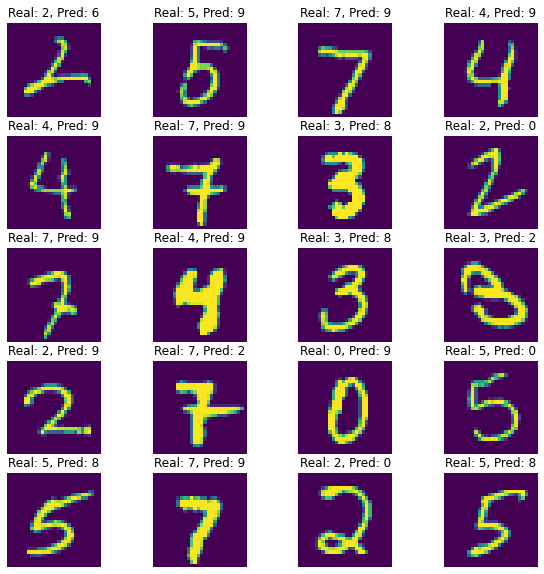

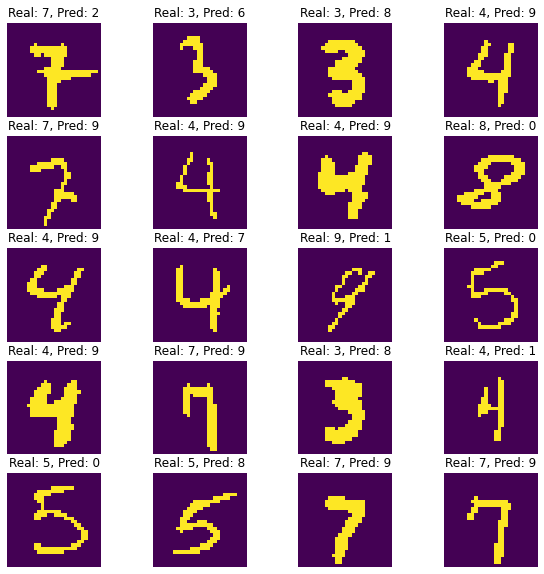

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred, x_test[:100])
eval.get_evaluation_report()

y_pred = gnb.fit(x_train_r, y_train).predict(x_test_r[:100])

eval = Evaluate(y_test[:100], y_pred, x_test_r[:100])
eval.get_evaluation_report()

##Σύγκριση υλοποιήσεων

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 1min 13s, sys: 12 ms, total: 1min 13s
Wall time: 1min 14s


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 323 ms, sys: 4.99 ms, total: 328 ms
Wall time: 335 ms


##Σχολιασμός

Κατά τον υπολογισμό της πιθανότητας "pxC", χάρη στη στρογγυλοποιήση των "x_train & x_test" sets, γνωρίζαμε για την κάθε εικόνα της κλάσης πόσες φορές ήταν "1" το συγκεκριμένο χαρακτηριστικό και διαιρώντας με το πλήθος των στοιχείων της κλάσης λαμβάναμε τη ζητούμενη πιθανότητα.
Ο δικός μας NaiveBayes ταξινομητής, εμφανίζει υψολότερες επιδόσεις και εγκυρότητα από τον έτοιμο. 
Ο τελευταίος, για τα στρογγυλοποιημένα σύνολα παρουσιάζει χαμηλότερες επιδόσεις.
Ωστόσο, ο έτοιμος ταξινομητής είναι αισθητά ταχύτερος από αυτόν που υλοποιήσαμε εμείς.

##4ο Μέρος: Multi-Layer Perceptron

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        #changes that should be done at weights
        #helps refresh of weights correct train
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0,input) #returns an array with elements >=0
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0 #true if input>0
        return grad_output*relu_grad #int*True = int
                                     #int*False = 0

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        """
        Weight Initialization
        """
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self,input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        
        output = np.dot(input,self.weights) + self.biases

        return output
    
    def backward(self,input,grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)
        
        #The T attribute is the transpose of the array,
        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

In [ ]:
def softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy from logits[batch,n_classes] and ids of correct answers"""
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits,reference_answers):
    """Compute crossentropy gradient from logits[batch,n_classes] and ids of correct answers"""
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    
    return (- ones_for_answers + softmax) / logits.shape[0]

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        '''
        Κατασκευή του MLP. Τα επίπεδα και το μέγεθός τους ορίζεται από την μεταβλήτη shape, ενώ
        το μέγεθος της εισόδου ορίζεται από την μεταβλήτη input_dim
        '''
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1],shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i],shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        
        for l in self.network:
            activations.append(l.forward(input))
            
            input = activations[-1]
            
            
            pass

                   
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis=-1)

    def fit(self, X, y):
        
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations  #layer_input[i] is an input for network[i]
        logits = layer_activations[-1]
        
        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)
        
        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) #grad w.r.t. input, also weight updates
        return np.mean(loss)

Epoch 24
Train accuracy: 0.75
Val accuracy: 0.7517


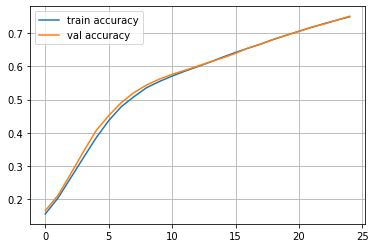

precision : 0.7703072400261106
recall : 0.7446128565208234
f1 : 0.7343594729722056
accuracy : 0.7517
Confusion matrix: 
[[ 933    0    7   10    0    4   19    1    6    0]
 [   0 1051    1    5    0    1    2    0   75    0]
 [  30   31  676  124   21    0   46   28   64   12]
 [  18   10   22  848    0   18    8   23   55    8]
 [   4   29    6    0  565    0   60   15   16  287]
 [  79   50    6  247   19  254   47   35   90   65]
 [  53   25   11    7    9    1  843    1    8    0]
 [   9   31   32    2   10    1    1  903   18   21]
 [  22   26   21  104    4    1   32   52  670   42]
 [  20   26   15   13   46    4    3   90   18  774]]
Some images with wrong predictions


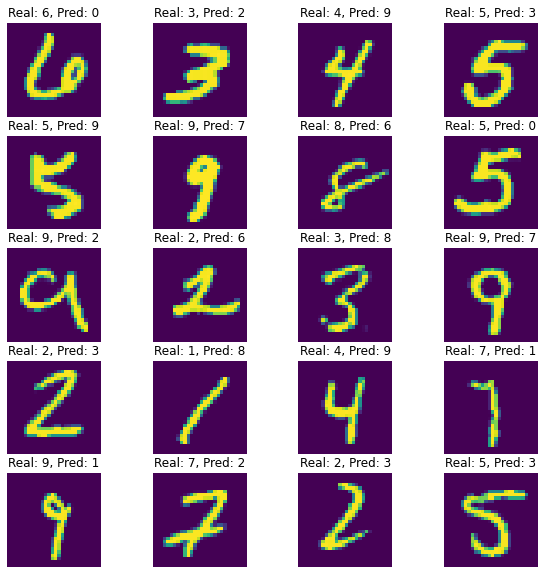

In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([100, 200, 100, 10], 28*28)
train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
     network.fit(x_train,y_train)
    
     train_log.append(np.mean(network.predict(x_train)==y_train))
     val_log.append(np.mean(network.predict(x_test)==y_test))
    
     clear_output()
     print("Epoch",epoch)
     print("Train accuracy:",train_log[-1])
     print("Val accuracy:",val_log[-1])
     plt.plot(train_log,label='train accuracy')
     plt.plot(val_log,label='val accuracy')
     plt.legend(loc='best')
     plt.grid()
     plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

##Έτοιμο Multi-Layer Perceptron

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


precision : 0.9674121749328176
recall : 0.9671022741195809
f1 : 0.9671582122271513
accuracy : 0.9675
Confusion matrix: 
[[ 965    1    1    1    2    4    1    2    2    1]
 [   0 1122    3    1    0    1    2    4    2    0]
 [   4    6  994   10    5    1    2    8    2    0]
 [   0    1    1  983    0   11    0    8    5    1]
 [   3    0    1    0  952    0    4    2    3   17]
 [   4    0    2   12    2  858    6    1    4    3]
 [   7    3    2    1    7    7  930    1    0    0]
 [   0    4   10    2    1    0    0 1004    1    6]
 [   6    2    7   21    5    9    4   12  905    3]
 [   4    4    0    8    8    7    1    9    6  962]]
Some images with wrong predictions


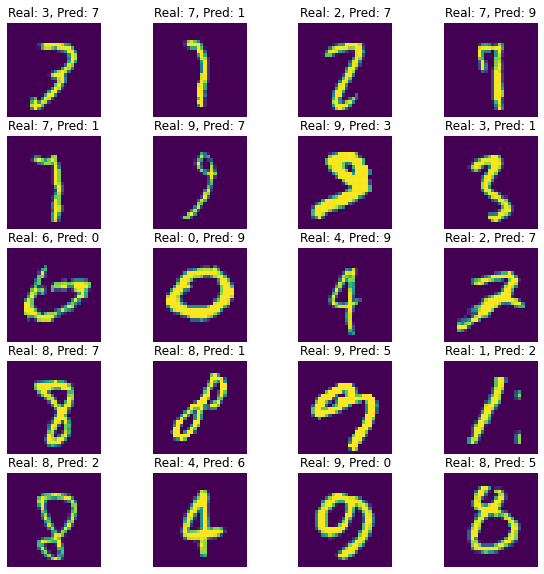

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred, x_test)
eval.get_evaluation_report()

##Σύγκριση υλοποιήσεων

Όπως φάνηκε παραπάνω, ο έτοιμος Multi-Layer Perceptron εμφανίζει υψηλότερες επιδόσεις σε precision, recall, f1 από τον δικό μας. 

###Αξιολόγηση- Συμπεράσματα

Συμπερασματικά, έχοντας υλοποιήσει και τους τρεις ταξινομητές (KNN, Naive Bayes, MLP) καταλήγουμε στο ότι οι έτοιμοι ταξινομητές knn & Multi-Layer Perceptron εμφάνιζαν υψηλότερα precision, recall
και f1. Στην περίπτωση του knn, ο δικός μας ταξινομητής, για ευκλίδεια απόσταση, ταυτίστηκε με τον έτοιμο. Τέλος, αξιοσημείωτο γεγονός ήταν τα υψηλότερα  precision, recall
και f1, για cosine απόσταση και το ότι τα τρία αυτά χαρακτηριστικά ήταν υψηλότερα για το δικό μας Naive Bayes συγκριτικά με τον έτοιμο.